In [1]:
import numpy as np
import scipy.stats as sps
import simulate as sim
from importlib import reload

In [2]:
from scipy.stats import norm

In [3]:
def n(x, m, s):
    return norm.pdf(x, m, s)

In [4]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 1000

dt = 1/250

In [5]:
true_params = [r, 2.2, 0.01, 0.3, 0.6, 0.02]

In [6]:
mu = true_params[0]
kappa = true_params[1]
theta = true_params[2]
sigma = true_params[3]
rho = true_params[4]
v0 = true_params[5]

In [7]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

In [8]:
import matplotlib.pyplot as plt

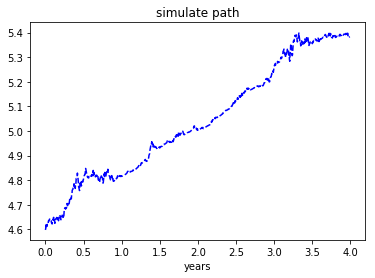

In [9]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

In [10]:
def proposal_sample(N, x_prev, y, dy):
    """
    x_prev is array of particles
    """
    m = x_prev + kappa*(theta-x_prev)*dt + sigma*rho*(dy - (mu-1/2*x_prev)*dt)
    s = sigma*np.sqrt(x_prev*(1-rho**2)*dt)
    return norm.rvs(m, s, N)

In [11]:
dy = y[0,1]-y[0,0]
n_particles = 1000
x_prev = np.array([v0] * n_particles)
particles = proposal_sample(n_particles, v0, y[0,1], dy)

In [12]:
def proposal(x, x_prev, y, dy):
    m = x_prev + kappa*(theta-x_prev)*dt + sigma*rho*(dy - (mu-1/2*x_prev)*dt)
    s = sigma*np.sqrt(x_prev*(1-rho**2)*dt)
    return norm.pdf(x, m, s)

In [13]:
def likelihood(y, x, x_prev, y_prev):
    m = y_prev + (mu-1/2*x)*dt
    s = np.sqrt(x_prev*dt)
    return norm.pdf(y, m ,s)

In [14]:
def transition(x, x_prev):
    m = 1/(1+1/2*sigma*rho*dt) * (x_prev + kappa*(theta-x_prev)*dt + 1/2*sigma*rho*x_prev*dt)
    s = 1/(1+1/2*sigma*rho*dt) * sigma * np.sqrt(x_prev*dt)
    return norm.pdf(x, m, s)

In [15]:
# calc weights through SIS
weights = likelihood(y[0,1], particles, x_prev, y[0,0])*transition(particles, x_prev)/proposal(particles, x_prev, y[0,1], dy)
weights = weights/sum(weights)

In [16]:
# SIR
cumulative_sum = np.cumsum(weights)
cumulative_sum[-1] = 1. # avoid round-off error
indexes = np.searchsorted(cumulative_sum, np.random.rand(len(weights)))

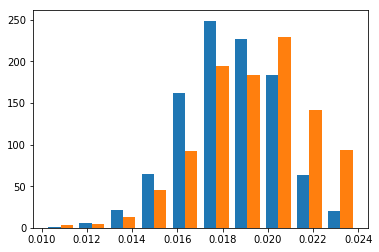

In [17]:
plt.hist([particles, particles[indexes]])
plt.show()

In [18]:
particles = particles[indexes]

In [19]:
p2 = particles

In [20]:
y_hat = y[0,0] + (mu-1/2*p2)*dt + np.sqrt(x_prev)*norm.rvs(0, np.sqrt(dt), len(p2))

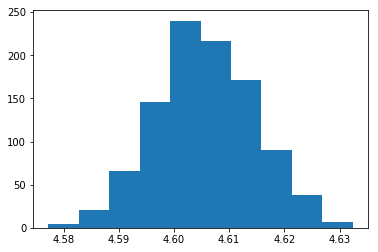

In [21]:
plt.hist(y_hat)
plt.show()

In [22]:
def prediction_density(y, y_prev, x):
    m = y_prev + (mu-1/2*x)*dt
    s = np.sqrt(x*dt)
    return norm.pdf(y, m, s)

In [23]:
py_hat = [np.mean(prediction_density(y_hat[i], y[0,0], p2)) for i in range(len(y_hat))]
py_hat = np.array(py_hat)/sum(py_hat)

(array([ 244.16582155,  376.71298182,  306.95131852,  334.85598384,
         537.16480741,  488.3316431 ,  634.83113603,  739.47363098,
        1025.4964505 , 2288.18255623]),
 array([7.79185129e-06, 1.51137057e-04, 2.94482263e-04, 4.37827469e-04,
        5.81172675e-04, 7.24517882e-04, 8.67863088e-04, 1.01120829e-03,
        1.15455350e-03, 1.29789871e-03, 1.44124391e-03]),
 <a list of 10 Patch objects>)

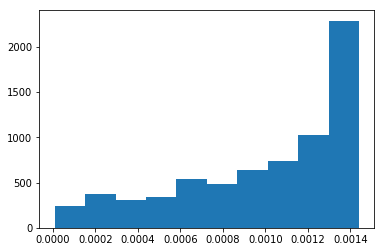

In [24]:
plt.hist(py_hat, density=30)

In [25]:
np.sum(py_hat*y_hat)

4.605695225787165

In [26]:
np.sum(particles*weights)

0.019432710466057438

In [27]:
import particle_filter as pf

In [256]:
reload(pf)

<module 'particle_filter' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/particle_filter.py'>

In [257]:
pf_heston = pf.PFHeston(np.array(y[0, :])[0], N=1000)

In [ ]:
obs, hidden = pf_heston.filter(np.array(y[0, :])[0], true_params)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
resampling since: 818.5299903010025
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
resampling since: 831.1506074514696
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
resampling since: 831.6304388642536
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
resampling since: 828.3870548580769
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
resampling since: 830.851607293334
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
2

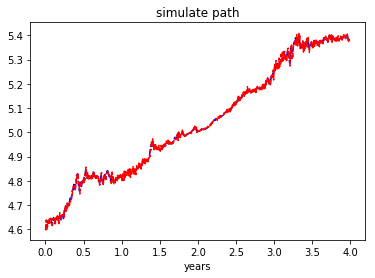

In [254]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, obs[1:], 'r--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[67]]


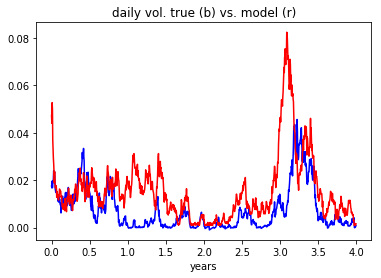

In [255]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years[:], np.array(y[1,1:])[0], 'b-')
plt.plot(years[:], hidden[1:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

([array([9735.,  265.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]),
  array([  28.,   58.,  237., 1240., 2618., 3335., 1582.,  549.,  298.,
           56.])],
 array([-0.00069497,  0.02759148,  0.05587793,  0.08416437,  0.11245082,
         0.14073727,  0.16902372,  0.19731017,  0.22559661,  0.25388306,
         0.28216951]),
 <a list of 2 Lists of Patches objects>)

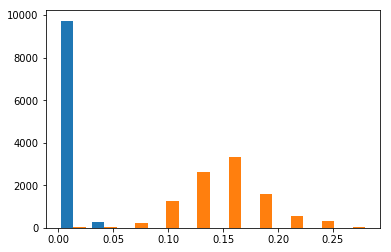

In [401]:
plt.hist([np.array(y[1,1:])[0], hidden])

In [356]:
sigma*rho*(y[0,1]-y[0,0]-(mu-1/2*v0)*dt)

0.00019289914950133016